## Ejercicios con Python Tarea Clase 11
### Pablo Ángel Mendoza Aguirre

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st 
from scipy.stats import beta
from scipy.special import comb
import matplotlib.pyplot as plt
from math import factorial as fac
%matplotlib inline

1.Suponer que $T$ distribuye beta donde la media es $\mu_p$ y varianza $\sigma_p^2$ y responder cual es la probabilidad $P(T\leq d)$.




P(T<=d)= 0.7013120540589285


/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


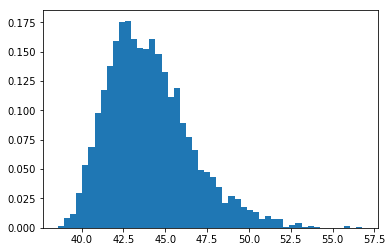

In [2]:
alpha=6
loc=44-alpha
beta=1
#beta es un caso especial de gamma, y beta va de [0,1] por lo que se puede reescribir como lo siguiente
P = st.gamma.cdf(47,loc,alpha,beta)
print('P(T<=d)=',P)

data=st.gamma.rvs(alpha, loc=loc, scale=beta, size=5000)
a = plt.hist(data, 50, normed=True)

2.Suponer que $T$ distribuye triangular donde el valor mas probable es $\mu_p$ el valor pesimista es $p=49$ y el valor optimista es $o=40$ y responder cual es la probabilidad $P(T\leq d)$.



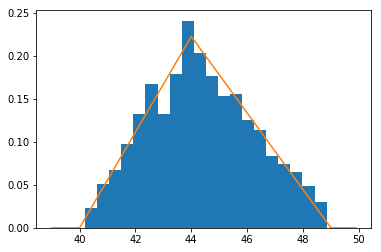

P(T<=d)= 0.9111111111111111


In [3]:
x = np.arange(39,50,0.1)
x2 = np.random.uniform(39,50,500)
a,b,c=40,44,49
plt.hist(st.triang.rvs(((b-a)/(c-a)),a,c-a, 1000),density=True,bins=20)
plt.plot(x,st.triang.pdf(x,((b-a)/(c-a)),a,c-a))
plt.show()
P = st.triang.cdf(47,((b-a)/(c-a)),a,c-a)
print('P(T<=d)=',P)

3.Una vez respondido los dos numerales anteriores, suponer que cada actividad es dependiente y su dependencia es mostrada en la figura donde se nombran los procesos, además considere que la distribución de cada actividad distribuye beta. Partiendo de la dependencia de las actividades, generar 10000 escenarios diferentes para cada actividad y utilizar montecarlo para responder ¿Cuál es la probabilidad $P(T\leq d)$. Comparar con el resultado obtenido 1 y comentar las diferencias (CONCLUIR)



In [4]:
N=1000
dataA = pd.DataFrame(st.gamma.rvs((1/3), loc= (2-(1/3)), scale=1, size=N))
dataB = pd.DataFrame(st.gamma.rvs((1), loc= (4-(1)), scale=1, size=N))
dataC = pd.DataFrame(st.gamma.rvs((2), loc= (10-(2)), scale=1, size=N))
dataE = pd.DataFrame(st.gamma.rvs((2/3), loc= (4-(2/3)), scale=1, size=N))
dataF = pd.DataFrame(st.gamma.rvs((1), loc= (5-(1)), scale=1, size=N))
dataJ = pd.DataFrame(st.gamma.rvs((1), loc= (8-(1)), scale=1, size=N))
dataL = pd.DataFrame(st.gamma.rvs((1), loc= (5-(1)), scale=1, size=N))
dataN = pd.DataFrame(st.gamma.rvs((2/3), loc= (6-(2/3)), scale=1, size=N))
df = pd.concat([dataA,dataB,dataC,dataE,dataF,dataJ,dataL,dataN], axis = 1)
sumas = df.sum(axis=1) #total de horas N simulaciones

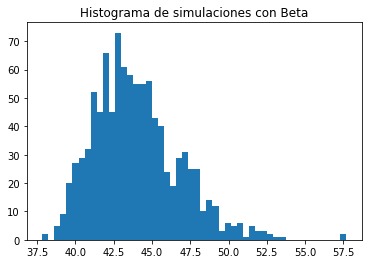

P(T<=d)= 0.6954518026005957


In [5]:
media = sumas.mean()
desvest = sumas.std()

a = plt.hist(sumas, bins = 50)
plt.title('Histograma de simulaciones con Beta')
plt.show()
P = st.gamma.cdf(47,media-desvest,desvest,1)
print('P(T<=d)=',P)

Se concluye que se comporta de forma muy similar si son dependientes o independientes, el resultado se sezga un poco a la izquierda en este caso pero es mínimo. Esto es resultado del tipo de distribución.

4.Repetir el literal 3 pero en este caso usando una distribución triangular.

In [8]:
N=1000
a,b,c = 1,2,3
dataA = pd.DataFrame(st.triang.rvs(((b-a)/(c-a)),a,c-a, N))
a,b,c = 2,3.5,8
dataB = pd.DataFrame(st.triang.rvs(((b-a)/(c-a)),a,c-a, N))
a,b,c = 6,9,18
dataC = pd.DataFrame(st.triang.rvs(((b-a)/(c-a)),a,c-a, N))
a,b,c = 1,4.5,5
dataE = pd.DataFrame(st.triang.rvs(((b-a)/(c-a)),a,c-a, N))
a,b,c = 4,4,10
dataF = pd.DataFrame(st.triang.rvs(((b-a)/(c-a)),a,c-a, N))
a,b,c = 3,9,9
dataJ = pd.DataFrame(st.triang.rvs(((b-a)/(c-a)),a,c-a, N))
a,b,c = 1,5.5,7
dataL = pd.DataFrame(st.triang.rvs(((b-a)/(c-a)),a,c-a, N))
a,b,c = 5,5.5,9
dataN = pd.DataFrame(st.triang.rvs(((b-a)/(c-a)),a,c-a, N))

df = pd.concat([dataA,dataB,dataC,dataE,dataF,dataJ,dataL,dataN], axis = 1)
sumas = df.sum(axis=1) #total de horas N simulaciones

P(T<=d)= 0.5493333333333333


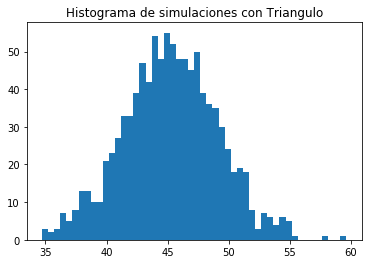

In [9]:
a = round(sumas.min())
b = round(sumas.mean())
c = round(sumas.max())
P = st.triang.cdf(47,((b-a)/(c-a)),a,c-a)
print('P(T<=d)=',P)
a = plt.hist(sumas, bins = 50)
plt.title('Histograma de simulaciones con Triangulo')
plt.show()


Las triangulares por su forma (sesgada a la derecha o a la izquieda) resultaron en un triango aproximadamente centrado, dando el resultado anterior, lo que parece más preciso que el que considera al fianl todo rtriangular, si cambia mucho el resultado.